In [1]:
import torch
from torch import nn

class EEGNet(nn.Module):
    def __init__(self,C,T,D,N,F_1,F_2):
        super().__init__()
        self.C=C
        self.T=T
        self.D=D
        self.F_1=F_1
        self.F_2=F_2
        self.N=N
        #EEG blks
        self.b1=self.blk_1()
        self.b2=self.blk_2()
        with torch.no_grad():
            dummy=torch.zeros(1,1,C,T)
            out=self.b2(self.b1(dummy))
            flattened_size=out.shape[1]

        self.net=nn.Sequential(
            self.b1,
            self.b2,
            nn.Linear(flattened_size,self.N)
		)
    def blk_1(self):
        return nn.Sequential(
                nn.Conv2d(
                    1,
                    self.F_1,
                    kernel_size=(1,64),
                    padding=(0,31)
                    ),#F_1@C*T
                nn.BatchNorm2d(self.F_1),
                nn.Conv2d(
                    self.F_1,
                    self.D*self.F_1,
                    kernel_size=(self.C,1),
                    groups=self.F_1
                    ),#(D*F_1)@1*T
                nn.BatchNorm2d(self.D*self.F_1),
                nn.ELU(),
                nn.AvgPool2d(kernel_size=(1,4)),#(D*F_1)@1*(T//4)
                nn.Dropout(p=0.25)#or p=0.5
                )

    def blk_2(self):
        return nn.Sequential(
                nn.Conv2d(
                    self.D*self.F_1,
                    self.D*self.F_1,
                    kernel_size=(1,16),
                    padding=(0,7),
                    groups=self.D*self.F_1,
                    bias=False
                    ),
                nn.Conv2d(
                    self.D*self.F_1,
                    self.F_2,
                    kernel_size=1,
                    bias=True
                    ),#F_2@1*(T//4)
                nn.BatchNorm2d(self.F_2),
                nn.ELU(),
                nn.AvgPool2d(kernel_size=(1,8)),#F_2@1*(T//32)
                nn.Dropout(p=0.25),#or p=0.5
                nn.Flatten()#F_2*(T//32)
                )

    def forward(self,x):
        x=self.net(x)
        return x

Subjects: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")


Cropping T from 206 to 192 for pooling compatibility
Epoch 1/20 - Loss: 0.5416, Val Acc: 0.7546
Epoch 2/20 - Loss: 0.4495, Val Acc: 0.7934
Epoch 3/20 - Loss: 0.4272, Val Acc: 0.7720
Epoch 4/20 - Loss: 0.4169, Val Acc: 0.7917
Epoch 5/20 - Loss: 0.4082, Val Acc: 0.7917
Epoch 6/20 - Loss: 0.4023, Val Acc: 0.7917
Epoch 7/20 - Loss: 0.4008, Val Acc: 0.8067
Epoch 8/20 - Loss: 0.3932, Val Acc: 0.8015
Epoch 9/20 - Loss: 0.3912, Val Acc: 0.7969
Epoch 10/20 - Loss: 0.3855, Val Acc: 0.8102
Epoch 11/20 - Loss: 0.3798, Val Acc: 0.8160
Epoch 12/20 - Loss: 0.3779, Val Acc: 0.8171
Epoch 13/20 - Loss: 0.3728, Val Acc: 0.8102
Epoch 14/20 - Loss: 0.3770, Val Acc: 0.8009
Epoch 15/20 - Loss: 0.3701, Val Acc: 0.8113
Epoch 16/20 - Loss: 0.3706, Val Acc: 0.8154
Epoch 17/20 - Loss: 0.3629, Val Acc: 0.8148
Epoch 18/20 - Loss: 0.3643, Val Acc: 0.8160
Epoch 19/20 - Loss: 0.3658, Val Acc: 0.8183
Epoch 20/20 - Loss: 0.3579, Val Acc: 0.8223
Best Val Acc (Subject 1): 0.8223


/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")


Cropping T from 206 to 192 for pooling compatibility
Epoch 1/20 - Loss: 0.5631, Val Acc: 0.7853
Epoch 2/20 - Loss: 0.4665, Val Acc: 0.8079
Epoch 3/20 - Loss: 0.4497, Val Acc: 0.8310
Epoch 4/20 - Loss: 0.4327, Val Acc: 0.8403
Epoch 5/20 - Loss: 0.4271, Val Acc: 0.8368
Epoch 6/20 - Loss: 0.4141, Val Acc: 0.8507
Epoch 7/20 - Loss: 0.4101, Val Acc: 0.8478
Epoch 8/20 - Loss: 0.4083, Val Acc: 0.8611
Epoch 9/20 - Loss: 0.4039, Val Acc: 0.8582
Epoch 10/20 - Loss: 0.3975, Val Acc: 0.8576
Epoch 11/20 - Loss: 0.4005, Val Acc: 0.8524
Epoch 12/20 - Loss: 0.3968, Val Acc: 0.8594
Epoch 13/20 - Loss: 0.3901, Val Acc: 0.8542
Epoch 14/20 - Loss: 0.3925, Val Acc: 0.8617
Epoch 15/20 - Loss: 0.3861, Val Acc: 0.8617
Epoch 16/20 - Loss: 0.3905, Val Acc: 0.8634
Epoch 17/20 - Loss: 0.3852, Val Acc: 0.8565
Epoch 18/20 - Loss: 0.3867, Val Acc: 0.8663
Epoch 19/20 - Loss: 0.3856, Val Acc: 0.8530
Epoch 20/20 - Loss: 0.3838, Val Acc: 0.8634
Best Val Acc (Subject 2): 0.8663


/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")


Cropping T from 206 to 192 for pooling compatibility
Epoch 1/20 - Loss: 0.5517, Val Acc: 0.6817
Epoch 2/20 - Loss: 0.4509, Val Acc: 0.7072
Epoch 3/20 - Loss: 0.4174, Val Acc: 0.7014
Epoch 4/20 - Loss: 0.4070, Val Acc: 0.6956
Epoch 5/20 - Loss: 0.3972, Val Acc: 0.7060
Epoch 6/20 - Loss: 0.3968, Val Acc: 0.7008
Epoch 7/20 - Loss: 0.3901, Val Acc: 0.7147
Epoch 8/20 - Loss: 0.3824, Val Acc: 0.7101
Epoch 9/20 - Loss: 0.3812, Val Acc: 0.7031
Epoch 10/20 - Loss: 0.3694, Val Acc: 0.7060
Epoch 11/20 - Loss: 0.3707, Val Acc: 0.7095
Epoch 12/20 - Loss: 0.3689, Val Acc: 0.7118
Epoch 13/20 - Loss: 0.3597, Val Acc: 0.7245
Epoch 14/20 - Loss: 0.3608, Val Acc: 0.7193
Epoch 15/20 - Loss: 0.3600, Val Acc: 0.7141
Epoch 16/20 - Loss: 0.3587, Val Acc: 0.7130
Epoch 17/20 - Loss: 0.3580, Val Acc: 0.7286
Epoch 18/20 - Loss: 0.3607, Val Acc: 0.7216
Epoch 19/20 - Loss: 0.3536, Val Acc: 0.7182
Epoch 20/20 - Loss: 0.3507, Val Acc: 0.7228
Best Val Acc (Subject 3): 0.7286


/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")


Cropping T from 206 to 192 for pooling compatibility
Epoch 1/20 - Loss: 0.5457, Val Acc: 0.7477
Epoch 2/20 - Loss: 0.4679, Val Acc: 0.7431
Epoch 3/20 - Loss: 0.4386, Val Acc: 0.7639
Epoch 4/20 - Loss: 0.4227, Val Acc: 0.7720
Epoch 5/20 - Loss: 0.4125, Val Acc: 0.7604
Epoch 6/20 - Loss: 0.4039, Val Acc: 0.7911
Epoch 7/20 - Loss: 0.4052, Val Acc: 0.7969
Epoch 8/20 - Loss: 0.3982, Val Acc: 0.7876
Epoch 9/20 - Loss: 0.3951, Val Acc: 0.7905
Epoch 10/20 - Loss: 0.3929, Val Acc: 0.7957
Epoch 11/20 - Loss: 0.3865, Val Acc: 0.7830
Epoch 12/20 - Loss: 0.3871, Val Acc: 0.8056
Epoch 13/20 - Loss: 0.3837, Val Acc: 0.7726
Epoch 14/20 - Loss: 0.3828, Val Acc: 0.7795
Epoch 15/20 - Loss: 0.3840, Val Acc: 0.7992
Epoch 16/20 - Loss: 0.3777, Val Acc: 0.7824
Epoch 17/20 - Loss: 0.3829, Val Acc: 0.7807
Epoch 18/20 - Loss: 0.3799, Val Acc: 0.8119
Epoch 19/20 - Loss: 0.3774, Val Acc: 0.7940
Epoch 20/20 - Loss: 0.3726, Val Acc: 0.7975
Best Val Acc (Subject 4): 0.8119


/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")


Cropping T from 206 to 192 for pooling compatibility
Epoch 1/20 - Loss: 0.5641, Val Acc: 0.7442
Epoch 2/20 - Loss: 0.4626, Val Acc: 0.8056
Epoch 3/20 - Loss: 0.4301, Val Acc: 0.7917
Epoch 4/20 - Loss: 0.4193, Val Acc: 0.7963
Epoch 5/20 - Loss: 0.4092, Val Acc: 0.7975
Epoch 6/20 - Loss: 0.4015, Val Acc: 0.8212
Epoch 7/20 - Loss: 0.4032, Val Acc: 0.8084
Epoch 8/20 - Loss: 0.3970, Val Acc: 0.7992
Epoch 9/20 - Loss: 0.3934, Val Acc: 0.8056
Epoch 10/20 - Loss: 0.3930, Val Acc: 0.8125
Epoch 11/20 - Loss: 0.3880, Val Acc: 0.8177
Epoch 12/20 - Loss: 0.3831, Val Acc: 0.8113
Epoch 13/20 - Loss: 0.3807, Val Acc: 0.8067
Epoch 14/20 - Loss: 0.3828, Val Acc: 0.8067
Epoch 15/20 - Loss: 0.3792, Val Acc: 0.8131
Epoch 16/20 - Loss: 0.3790, Val Acc: 0.8044
Epoch 17/20 - Loss: 0.3787, Val Acc: 0.8067
Epoch 18/20 - Loss: 0.3714, Val Acc: 0.8131
Epoch 19/20 - Loss: 0.3754, Val Acc: 0.8183
Epoch 20/20 - Loss: 0.3745, Val Acc: 0.8067
Best Val Acc (Subject 5): 0.8212


/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")


Cropping T from 206 to 192 for pooling compatibility
Epoch 1/20 - Loss: 0.5591, Val Acc: 0.7714
Epoch 2/20 - Loss: 0.4574, Val Acc: 0.7980
Epoch 3/20 - Loss: 0.4275, Val Acc: 0.7975
Epoch 4/20 - Loss: 0.4112, Val Acc: 0.8148
Epoch 5/20 - Loss: 0.4081, Val Acc: 0.8270
Epoch 6/20 - Loss: 0.3999, Val Acc: 0.8177
Epoch 7/20 - Loss: 0.3939, Val Acc: 0.8299
Epoch 8/20 - Loss: 0.3891, Val Acc: 0.8131
Epoch 9/20 - Loss: 0.3907, Val Acc: 0.8333
Epoch 10/20 - Loss: 0.3855, Val Acc: 0.8397
Epoch 11/20 - Loss: 0.3792, Val Acc: 0.8333
Epoch 12/20 - Loss: 0.3758, Val Acc: 0.8426
Epoch 13/20 - Loss: 0.3719, Val Acc: 0.8299
Epoch 14/20 - Loss: 0.3760, Val Acc: 0.8536
Epoch 15/20 - Loss: 0.3738, Val Acc: 0.8351
Epoch 16/20 - Loss: 0.3654, Val Acc: 0.8553
Epoch 17/20 - Loss: 0.3678, Val Acc: 0.8397
Epoch 18/20 - Loss: 0.3628, Val Acc: 0.8403
Epoch 19/20 - Loss: 0.3643, Val Acc: 0.8443
Epoch 20/20 - Loss: 0.3628, Val Acc: 0.8414
Best Val Acc (Subject 6): 0.8553


/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")


Cropping T from 206 to 192 for pooling compatibility
Epoch 1/20 - Loss: 0.5489, Val Acc: 0.7703
Epoch 2/20 - Loss: 0.4556, Val Acc: 0.8345
Epoch 3/20 - Loss: 0.4256, Val Acc: 0.8588
Epoch 4/20 - Loss: 0.4156, Val Acc: 0.8519
Epoch 5/20 - Loss: 0.4021, Val Acc: 0.8646
Epoch 6/20 - Loss: 0.3873, Val Acc: 0.8588
Epoch 7/20 - Loss: 0.3804, Val Acc: 0.8652
Epoch 8/20 - Loss: 0.3785, Val Acc: 0.8704
Epoch 9/20 - Loss: 0.3762, Val Acc: 0.8744
Epoch 10/20 - Loss: 0.3719, Val Acc: 0.8646
Epoch 11/20 - Loss: 0.3673, Val Acc: 0.8588
Epoch 12/20 - Loss: 0.3694, Val Acc: 0.8628
Epoch 13/20 - Loss: 0.3614, Val Acc: 0.8686
Epoch 14/20 - Loss: 0.3653, Val Acc: 0.8605
Epoch 15/20 - Loss: 0.3604, Val Acc: 0.8652
Epoch 16/20 - Loss: 0.3624, Val Acc: 0.8738
Epoch 17/20 - Loss: 0.3550, Val Acc: 0.8640
Epoch 18/20 - Loss: 0.3567, Val Acc: 0.8715
Epoch 19/20 - Loss: 0.3541, Val Acc: 0.8617
Epoch 20/20 - Loss: 0.3502, Val Acc: 0.8721
Best Val Acc (Subject 7): 0.8744


/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")


Cropping T from 206 to 192 for pooling compatibility
Epoch 1/20 - Loss: 0.5238, Val Acc: 0.7286
Epoch 2/20 - Loss: 0.4358, Val Acc: 0.7471
Epoch 3/20 - Loss: 0.4187, Val Acc: 0.7512
Epoch 4/20 - Loss: 0.4022, Val Acc: 0.7494
Epoch 5/20 - Loss: 0.3997, Val Acc: 0.7703
Epoch 6/20 - Loss: 0.3962, Val Acc: 0.7436
Epoch 7/20 - Loss: 0.3914, Val Acc: 0.7564
Epoch 8/20 - Loss: 0.3831, Val Acc: 0.7517
Epoch 9/20 - Loss: 0.3804, Val Acc: 0.7506
Epoch 10/20 - Loss: 0.3785, Val Acc: 0.7685
Epoch 11/20 - Loss: 0.3758, Val Acc: 0.7622
Epoch 12/20 - Loss: 0.3684, Val Acc: 0.7691
Epoch 13/20 - Loss: 0.3769, Val Acc: 0.7726
Epoch 14/20 - Loss: 0.3673, Val Acc: 0.7627
Epoch 15/20 - Loss: 0.3690, Val Acc: 0.7604
Epoch 16/20 - Loss: 0.3640, Val Acc: 0.7645
Epoch 17/20 - Loss: 0.3618, Val Acc: 0.7569
Epoch 18/20 - Loss: 0.3604, Val Acc: 0.7587
Epoch 19/20 - Loss: 0.3572, Val Acc: 0.7674
Epoch 20/20 - Loss: 0.3573, Val Acc: 0.7662
Best Val Acc (Subject 8): 0.7726


/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")


Cropping T from 206 to 192 for pooling compatibility
Epoch 1/20 - Loss: 0.5606, Val Acc: 0.7841
Epoch 2/20 - Loss: 0.4583, Val Acc: 0.8322
Epoch 3/20 - Loss: 0.4324, Val Acc: 0.8414
Epoch 4/20 - Loss: 0.4278, Val Acc: 0.8588
Epoch 5/20 - Loss: 0.4208, Val Acc: 0.8628
Epoch 6/20 - Loss: 0.4109, Val Acc: 0.8773
Epoch 7/20 - Loss: 0.4093, Val Acc: 0.8565
Epoch 8/20 - Loss: 0.4062, Val Acc: 0.8652
Epoch 9/20 - Loss: 0.4069, Val Acc: 0.8594
Epoch 10/20 - Loss: 0.4021, Val Acc: 0.8576
Epoch 11/20 - Loss: 0.3973, Val Acc: 0.8669
Epoch 12/20 - Loss: 0.3950, Val Acc: 0.8588
Epoch 13/20 - Loss: 0.3933, Val Acc: 0.8600
Epoch 14/20 - Loss: 0.3900, Val Acc: 0.8669
Epoch 15/20 - Loss: 0.3918, Val Acc: 0.8756
Epoch 16/20 - Loss: 0.3891, Val Acc: 0.8721
Epoch 17/20 - Loss: 0.3911, Val Acc: 0.8657
Epoch 18/20 - Loss: 0.3844, Val Acc: 0.8704
Epoch 19/20 - Loss: 0.3829, Val Acc: 0.8808
Epoch 20/20 - Loss: 0.3827, Val Acc: 0.8675
Best Val Acc (Subject 9): 0.8808


/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")
/usr/local/lib/python3.12/dist-packages/moabb/datasets/preprocessing.py:278: UserWarning: warnEpochs <Epochs | 576 events (all good), 0 – 0.801 s (baseline off), ~14.5 MiB, data loaded,
 'Target': 96
 'NonTarget': 480>
  warn(f"warnEpochs {epochs}")


Cropping T from 206 to 192 for pooling compatibility
Epoch 1/20 - Loss: 0.6015, Val Acc: 0.7425
Epoch 2/20 - Loss: 0.4660, Val Acc: 0.8171
Epoch 3/20 - Loss: 0.4315, Val Acc: 0.8501
Epoch 4/20 - Loss: 0.4219, Val Acc: 0.8524
Epoch 5/20 - Loss: 0.4104, Val Acc: 0.8449
Epoch 6/20 - Loss: 0.4092, Val Acc: 0.8634
Epoch 7/20 - Loss: 0.4038, Val Acc: 0.8721
Epoch 8/20 - Loss: 0.3989, Val Acc: 0.8646
Epoch 9/20 - Loss: 0.3971, Val Acc: 0.8542
Epoch 10/20 - Loss: 0.3948, Val Acc: 0.8611
Epoch 11/20 - Loss: 0.3955, Val Acc: 0.8663
Epoch 12/20 - Loss: 0.3907, Val Acc: 0.8675
Epoch 13/20 - Loss: 0.3850, Val Acc: 0.8623
Epoch 14/20 - Loss: 0.3848, Val Acc: 0.8600
Epoch 15/20 - Loss: 0.3807, Val Acc: 0.8663
Epoch 16/20 - Loss: 0.3829, Val Acc: 0.8600
Epoch 17/20 - Loss: 0.3812, Val Acc: 0.8652
Epoch 18/20 - Loss: 0.3841, Val Acc: 0.8686
Epoch 19/20 - Loss: 0.3796, Val Acc: 0.8605
Epoch 20/20 - Loss: 0.3768, Val Acc: 0.8738
Best Val Acc (Subject 10): 0.8738
Subject 1: 0.8223
Subject 2: 0.8663
Subjec

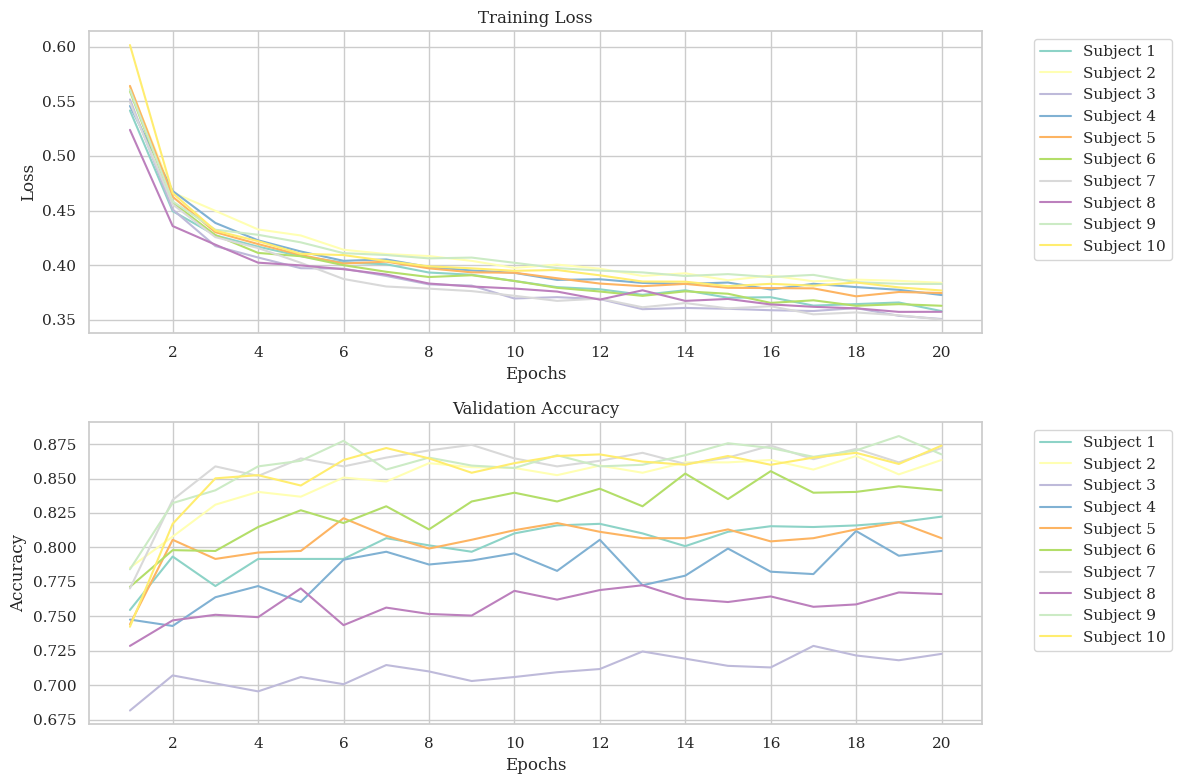

In [3]:
#!pip install moabb
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from moabb import datasets
from moabb.paradigms import P300
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dataset = datasets.BNCI2014_009()
paradigm = P300()
subjects = dataset.subject_list
print(f"Subjects: {subjects}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
all_results = []
all_loss_histories = []
all_val_acc_histories = []

for test_subj in subjects:
    train_subs = [s for s in subjects if s != test_subj]
    X_train, y_train, _ = paradigm.get_data(dataset=dataset, subjects=train_subs)
    X_val, y_val, _ = paradigm.get_data(dataset=dataset, subjects=[test_subj])
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_val = le.transform(y_val)

    class_counts = Counter(y_train)
    nontarget_count = class_counts[0]
    target_count = class_counts[1]
    total_samples = len(y_train)
    nontarget_ratio = nontarget_count / total_samples
    target_ratio = target_count / total_samples
    weights = torch.tensor([1.0 / nontarget_ratio, 1.0 / target_ratio]).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)

    # normalization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
    X_val = scaler.transform(X_val.reshape(X_val.shape[0], -1)).reshape(X_val.shape)
    C, T = X_train.shape[1], X_train.shape[2]
    if T % 32 != 0:
        T_new = (T // 32) * 32
        print(f"Cropping T from {T} to {T_new} for pooling compatibility")
        X_train = X_train[:, :, :T_new]
        X_val = X_val[:, :, :T_new]
        T = T_new
    X_train = X_train[:, np.newaxis, :, :]
    X_val = X_val[:, np.newaxis, :, :]

    # to tensor
    X_train = torch.FloatTensor(X_train)
    y_train = torch.LongTensor(y_train)
    X_val = torch.FloatTensor(X_val)
    y_val = torch.LongTensor(y_val)

    # data loader
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=128, shuffle=False)
    model = EEGNet(C=C, T=T, D=2, N=2, F_1=8, F_2=16).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    num_epochs = 20
    best_val_acc = 0
    loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        avg_train_loss = train_loss / len(train_loader)
        loss_history.append(avg_train_loss)
        model.eval()
        val_preds, val_true = [], []
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x)
                _, preds = torch.max(outputs, 1)
                val_preds.extend(preds.cpu().numpy())
                val_true.extend(batch_y.cpu().numpy())

        val_acc = accuracy_score(val_true, val_preds)
        val_acc_history.append(val_acc)
        if val_acc > best_val_acc:
            best_val_acc = val_acc

        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {train_loss/len(train_loader):.4f}, Val Acc: {val_acc:.4f}")

    all_results.append(best_val_acc)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    print(f"Best Val Acc (Subject {test_subj}): {best_val_acc:.4f}")

mean_acc = np.mean(all_results)
std_acc = np.std(all_results)
for i, acc in enumerate(all_results, start=1):
    print(f"Subject {i}: {acc:.4f}")
print(f"Mean Acc: {mean_acc:.4f} ± {std_acc:.4f}")

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

colors = plt.cm.Set3(np.linspace(0, 1, len(subjects)))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
epochs_range = range(1, num_epochs + 1)

for i, (loss_h, val_h) in enumerate(zip(all_loss_histories, all_val_acc_histories)):
    ax1.plot(epochs_range, loss_h, color=colors[i], label=f'Subject {subjects[i]}')
    ax2.plot(epochs_range, val_h, color=colors[i], label=f'Subject {subjects[i]}')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.set_title('Training Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

ax2.set_title('Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()